# Ejercicio de Histogramas y Diagramas de caja

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-01-25

**Fecha de actualización:** 2022-01-26

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leer archivo en un DtaFrame
filename = 'data/catsvdogs.xlsx'
df = pd.read_excel(filename)
df.head()

,Location,Number of Households (in 1000),Percentage of households with pets,Number of Pet Households (in 1000),Percentage of Dog Owners,Dog Owning Households (1000s),Mean Number of Dogs per household,Dog Population (in 1000),Percentage of Cat Owners,Cat Owning Households,Mean Number of Cats,Cat Population
0,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [3]:
df.columns

Index(['Location', 'Number of Households (in 1000)',
       'Percentage of households with pets',
       'Number of Pet Households (in 1000)', 'Percentage of Dog Owners',
       'Dog Owning Households (1000s)', 'Mean Number of Dogs per household',
       'Dog Population (in 1000)', 'Percentage of Cat Owners',
       'Cat Owning Households', 'Mean Number of Cats', 'Cat Population'],
      dtype='object')

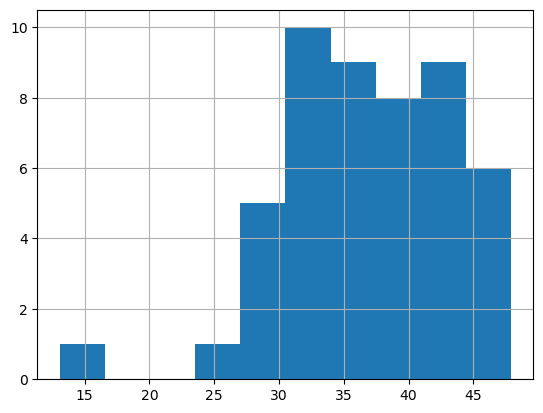

In [4]:
# Histograma del porcentaje de propietarios de perros
plt.style.use('default')
fig, ax = plt.subplots(1,1)
ax.hist(df['Percentage of Dog Owners'])
ax.grid()



**Interpretación**

En la mayoría de estados, entre un 25% y 50% de los habitantes tiene almenos un perro como mascota, con un caso aislado de un estado en el cual aproximadamente solo un 15% de su población tiene un perro.

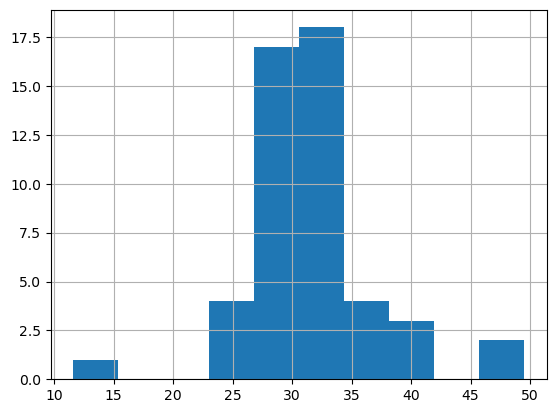

In [5]:
# Histograma del porcentaje de propietarios de perros por estado
plt.style.use('default')
fig, ax = plt.subplots(1,1)
ax.hist(df['Percentage of Cat Owners'])
ax.grid()

**Interpretación**
En la mayoría de los estados, entre un 25% y 40% de la población tiene almenos un gato como mascota.

Existen dos casos aislados: 
1. Un estado en el que solo un 8%, aproximadamente, tiene almenos un gatos como máscota.
2. Dos estados donde en promedio un 47% de sus habitantes tiene como mínimo un gato como mascota.

## Dos histogramas en un mismo gráfico.
Luego de graficar los dos histogramas en un mismo gráfico y modificar el tamaño de las bandejas (bins) se evidencia que la frecuencia en cada bandeja puede variar drásticamente.

Como ejemplo se presentan los dos gráficos siguientes, modificando únicamente el ancho de cada bandeja.

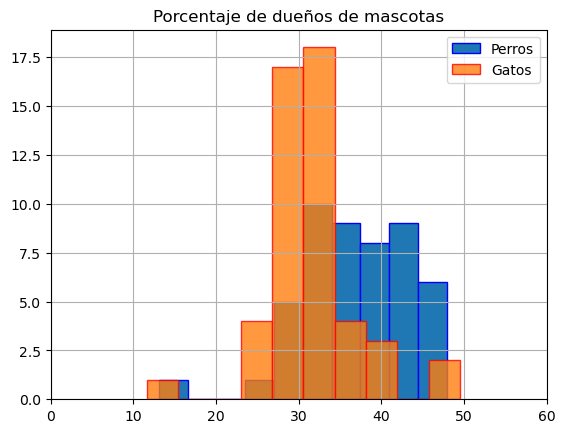

In [6]:
# Histograma del porcentaje de propietarios de perros
plt.style.use('default')
fig, ax = plt.subplots(1,1)

# Se ha observado que para el conjunto de datos dado el los porcentajes
# están, aproximadamente, entre 10 y 50,  
ax.set_xlim(0,60)

# Graficar histograma sobre el procentaje de dueños de perros 
ax.hist(df['Percentage of Dog Owners'], edgecolor='#00F', label='Perros')

# Graficar histograma sobre el procentaje de dueños de gatos 
ax.hist(df['Percentage of Cat Owners'], alpha=0.8, edgecolor='#F00', label='Gatos')

ax.set_title('Porcentaje de dueños de mascotas')
ax.legend()
ax.grid()


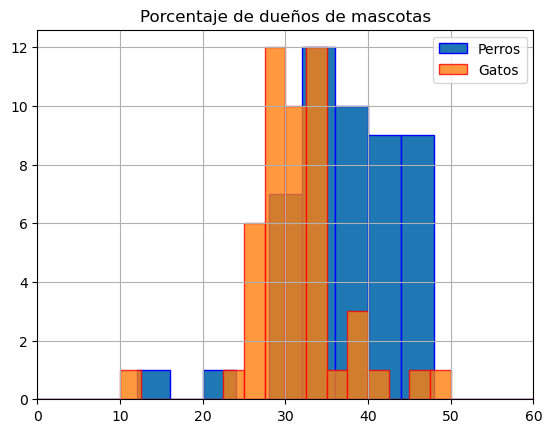

In [7]:
# Histograma del porcentaje de propietarios de perros
plt.style.use('default')
fig, ax = plt.subplots(1,1)

# Lista de los intervalos de cada 'bin'(Se modifica el ancho de bandeja)
# De este modo, lo más probable es que cada bandeja contenga un número menor
# de coincidencias 
binsDog =  [i * 4 for i in range (25)]
binsCat =  [2.5*i for i in range (25)]

# Se ha observado que para el conjunto de datos dado el los porcentajes
# están, aproximadamente, entre 10 y 50,  
ax.set_xlim(0,60)

# Graficar histograma sobre el procentaje de dueños de perros 
ax.hist(df['Percentage of Dog Owners'], bins=binsDog, edgecolor='#00F', label='Perros')

# Graficar histograma sobre el procentaje de dueños de gatos 
ax.hist(df['Percentage of Cat Owners'], alpha=0.8   , bins=binsCat, edgecolor='#F00', label='Gatos')

ax.set_title('Porcentaje de dueños de mascotas')
ax.grid()
ax.legend()


## Diagrama de caja y bigotes
Diagramas de caja y bigotes del número medio de gatos por hogar del número medio de perros.

       Mean Number of Dogs per household  Mean Number of Cats
count                          49.000000            49.000000
mean                            1.587755             2.040816
std                             0.202724             0.191397
min                             1.100000             1.700000
25%                             1.400000             1.900000
50%                             1.600000             2.000000
75%                             1.700000             2.200000
max                             2.100000             2.600000

Mediana:
Mean Number of Dogs per household    1.6
Mean Number of Cats                  2.0
dtype: float64


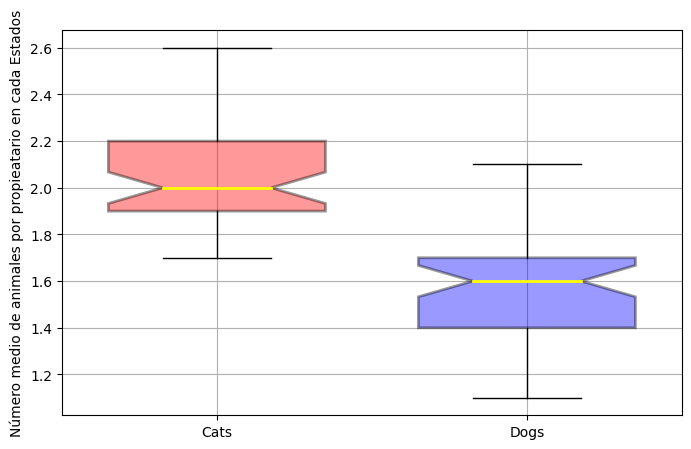

In [8]:
meanDogs = df.loc[:,'Mean Number of Dogs per household'].values # Obtiene la columna de perros promedio
meanCats = df.loc[:,'Mean Number of Cats'].values # Obtiene la columna de gatos promedio
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5)) # Se define un subplot

# Gráfico de caja y bigotes
plots = ax.boxplot([meanCats,meanDogs], labels=['Cats', 'Dogs'],
            notch = True,
            widths = .7,
            patch_artist=True,
            medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
            boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));

# Extrae el primer box plot (meanCats) para modificar posteriormente su color.
boxplot1 = plots['boxes'][0]
boxplot1.set_facecolor('red') # Modificar el color a rojo

ax.set_ylabel('Número medio de animales por propieatario en cada Estados')
ax.grid()

# Imprimir estadísticos principales para compararlos con el gráfico
print(df.loc[:,['Mean Number of Dogs per household','Mean Number of Cats']].describe())

# Imprimir la mediana de las dos columnas bajo análisis para compararlos con el gráfico
print('\nMediana:')
print(df.loc[:,['Mean Number of Dogs per household','Mean Number of Cats']].median())

**Interpretación**

En el gráfico de caja anterior se puede observar que la mediana de gatos por hogar es de 2, mientras la mediana de perros por hogar es de 1.6. Estos valores se pueden corroborar luego de obtener la mediana del conjunto de cada columna analizada.

Además, se observa que aproximadamente el mínimo de gatos es de 1.7 y el máximo de 2.6, mientras que el mínimo de perros es de 1.1 y un máximo de 2.1 aproximadamente.

EL rango del Q1 y Q2 de los gatos está entre 1.9 y 2.2.

EL rango del Q1 y Q2 de los perros está entre 1.4 y 1.7.

Con esta información podemos inferir que existen más gatos que perros promedio por hogar. 